In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import re

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [49]:
#New column for classification labels, either 1 or 0
def scoreCol(df, text_field):
    scores = []
    for x in df[text_field]:
        if x == 'positive':
            x = 2
            scores.append(x)
        elif x == 'negative':
            x = 0
            scores.append(x)
        elif x == 'neutral':
            x = 1
            scores.append(x)
    df['scores'] = scores
    return df

In [50]:
#Read data into dataframe
data = pd.read_csv(r'rawData.csv')
data.head(5)

,textID,text,sentiment
0,cb774db0d1,"['i', '`', 'd', 'have', 'responded', 'if', 'i'...",neutral
1,549e992a42,"['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...",negative
2,088c60f138,"['my', 'boss', 'is', 'bullying', 'me']",negative
3,9642c003ef,"['what', 'interview', 'leave', 'me', 'alone']",negative
4,358bd9e861,"['sons', 'of', 'why', 'couldn', '`', 't', 'the...",negative


In [51]:
#Call classification label method
data = scoreCol(data,'sentiment')

In [52]:
listOfTokens = []
for tokensUnparsed in data["text"].tolist():
    tokensUnparsed = re.sub("(\\'|'|\\\")", '"', tokensUnparsed)
    listOfTokens.append(tokensUnparsed[2:-2].split('", "'))

In [53]:
all_words = [token for tokens in listOfTokens for token in tokens]
sentence_lengths = [len(tokens) for tokens in listOfTokens]
Vocabulary = sorted(list(set(all_words)))
print("%s tokens total, with a vocabulary size of %s" % (len(all_words), len(Vocabulary)))

378839 tokens total, with a vocabulary size of 26323


In [54]:
# Create list_corpus
token_list = data['text'].tolist()
list_corpus = []
for tokens in token_list:
    tokens = tokens.replace("[","").replace("]","").replace("'","").replace(",","")
    list_corpus.append(tokens)
print(list_corpus[:5])

# Get labels
list_labels = []
for l in data['scores'].tolist():
    label = int(l)
    list_labels.append(label)

['i ` d have responded if i were going', 'sooo sad i will miss you here in san diego', 'my boss is bullying me', 'what interview leave me alone', 'sons of why couldn ` t they put them on the releases we already bought']


In [55]:
#Do a check...
print(list_corpus[:5])
print(list_labels[:5])

['i ` d have responded if i were going', 'sooo sad i will miss you here in san diego', 'my boss is bullying me', 'what interview leave me alone', 'sons of why couldn ` t they put them on the releases we already bought']
[1, 0, 0, 0, 0]


In [56]:
# Convert all review documents to a sparse matrix of token counts
vectorizer = TfidfVectorizer()
termDocumentMatrix = vectorizer.fit_transform(list_corpus)

In [57]:
#Split the training dataset into two sections:
x_train, x_test, y_train, y_test = train_test_split(termDocumentMatrix, list_labels, test_size = 0.2)

In [58]:
#Create a Multinominal Classifier
mnb = MultinomialNB()

In [59]:
#Train the model using the training sets
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
#Predict the response for test dataset
y_predicted_counts = mnb.predict(x_test)

In [61]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)

data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = 0.612, precision = 0.691, recall = 0.612, f1 = 0.596
data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = 0.612, precision = 0.691, recall = 0.612, f1 = 0.596


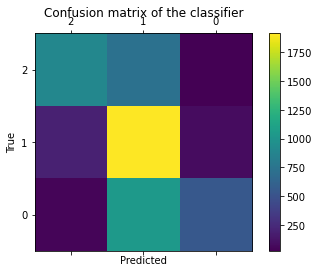

[[ 902  727   26]
 [ 197 1914   89]
 [  52 1043  547]]


In [62]:
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
labels = [2,1,0]
cm = metrics.confusion_matrix(y_test,y_predicted_counts, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

### Perform cross fold validation 

In [63]:
print(len(vectorizer.get_feature_names()))

26283


In [64]:
print(termDocumentMatrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
real_pred = pd.DataFrame({'y_true':y_test, 'y_pred':y_predicted_counts})
real_pred

,y_true,y_pred
0,1,1
1,1,2
2,2,2
3,0,0
4,1,1
...,...,...
5492,0,1
5493,1,1
5494,0,1
5495,2,2


In [66]:
cv_results = cross_val_score(mnb, x_train, y_train, scoring = 'accuracy', cv=5, n_jobs=-1)

In [67]:
cv_results

array([0.59790766, 0.60404821, 0.60404821, 0.59677053, 0.60327571])

In [68]:
print("Accuracy archived: {0} %".format( round(accuracy_score(real_pred['y_true'],real_pred['y_pred']), 2)))

Accuracy archived: 0.61 %


In [69]:
print(classification_report(real_pred['y_true'],real_pred['y_pred']))

              precision    recall  f1-score   support

           0       0.83      0.33      0.47      1642
           1       0.52      0.87      0.65      2200
           2       0.78      0.55      0.64      1655

    accuracy                           0.61      5497
   macro avg       0.71      0.58      0.59      5497
weighted avg       0.69      0.61      0.60      5497

